# Word2Vec


## FastText

FastText is selected in first place to generate wordembeddings mainly because it uses subword information providing the ability to compute vectors for words not included in the training corpus and also to identify as neighbors  mispelled words which are very frequent on this corpus.
FastText provides two models for computing word representations: skipgram and cbow ('continuous-bag-of-words').
The skipgram model learns to predict a target word thanks to a nearby word. On the other hand, the cbow model predicts the target word according to its context. 
The model has been trained on the Rx thorax corpus (3M words) with the skipgram model using the following parameters: 
- Vector size: 100 dimensions
- Subword between 3 and 6 characters: The subwords are all the substrings contained in a word between the minimum size (nmin) and the maximal size (nmax). 
- Number of epoch 5
- Learning rate: 0.05
- Threads: 12

In [8]:
import fastText 
from fastText import load_model

f = load_model('fasttext/text.bin')
words, frequency = f.get_words(include_freq=True)
print("Vocabulary size: " + repr(len(words)))
print("Frequency: "+ repr(frequency))
subwords = f.get_subwords("cardio")
print("Subwords for the keyword 'cardio': \n" + repr(subwords))
vector = f.get_word_vector("cardio")
print("Print the vector for the keyword 'cardio': \n" + repr(vector))

Vocabulary size: 4706
Frequency: array([255268, 113804,  95589, ...,      5,      5,      5])
Subwords for the keyword 'cardio': 
(['cardio', '<ca', '<car', '<card', '<cardi', 'car', 'card', 'cardi', 'cardio', 'ard', 'ardi', 'ardio', 'ardio>', 'rdi', 'rdio', 'rdio>', 'dio', 'dio>', 'io>'], array([    480,  921453, 1327965,  897583,  968334,  738499,  284865,
       1860580, 1876473,  256796,  870027, 1139476,  714950,   32160,
        189285,  278249,  568309, 1750713, 1270655]))
Print the vector for the keyword 'cardio': 
array([-0.0093281 , -0.15532416,  0.0948198 , -0.08907584,  0.25190157,
       -0.10687302,  0.01649686, -0.20749712,  0.11510517, -0.02903952,
       -0.0196301 ,  0.28202081,  0.00626374, -0.03796449,  0.31332636,
       -0.11211477, -0.07280819,  0.09385599,  0.25875148, -0.03122052,
       -0.10758104,  0.11866977, -0.14313541, -0.0205832 , -0.47141314,
       -0.14188825,  0.28987271,  0.26812938, -0.17702948,  0.03432148,
       -0.20997262, -0.03703849, -0.075

### Nearest neighbors: 
A simple way to check the quality of word vectors is to look at its nearest neighbors. This give an intuition of the type of semantic information the vectors are able to capture. We see that misspelled word matches also to reasonable words.

./fasttext nn fastext/text.bin
    Pre-computing word vectors... done.
Query word? epoc
radiologicos 0.858431
signos 0.823974
atrapamiento 0.763774
marcados 0.758819
ginecomastia 0.704623
aereo 0.699707
radilogicos 0.69087
cardiologicos 0.658289
atrapameinto 0.653904
leves 0.631641

Query word? derrame
errame 0.872163
pleural 0.83647
derrames 0.787511
derame 0.6965
hemoneumotorax 0.674904
emporamiento 0.651032
componente 0.649664
pelural 0.645976
emperamiento 0.639643
pasiva 0.638568

### Generating vector for unknown words: 
The word pneumocistis does not exist on the corpus but we can still query its closest existing words


Query word? pneumocystis
neumocistis 0.933387
neumoconiosis 0.777179
micoplasma 0.739769
broconeumonia 0.726581
mycoplasma 0.720797
distress 0.702721
bronconeumonia 0.702127
respiratorio 0.690402
neumonias 0.67721
neumonitis 0.66742

### t-SNE
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. 

In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline


"Creates a TSNE model"
labels = []
tokens = []

for word in f.get_words(include_freq=False):
    tokens.append(f.get_word_vector(word))
    labels.append(word)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

    
    

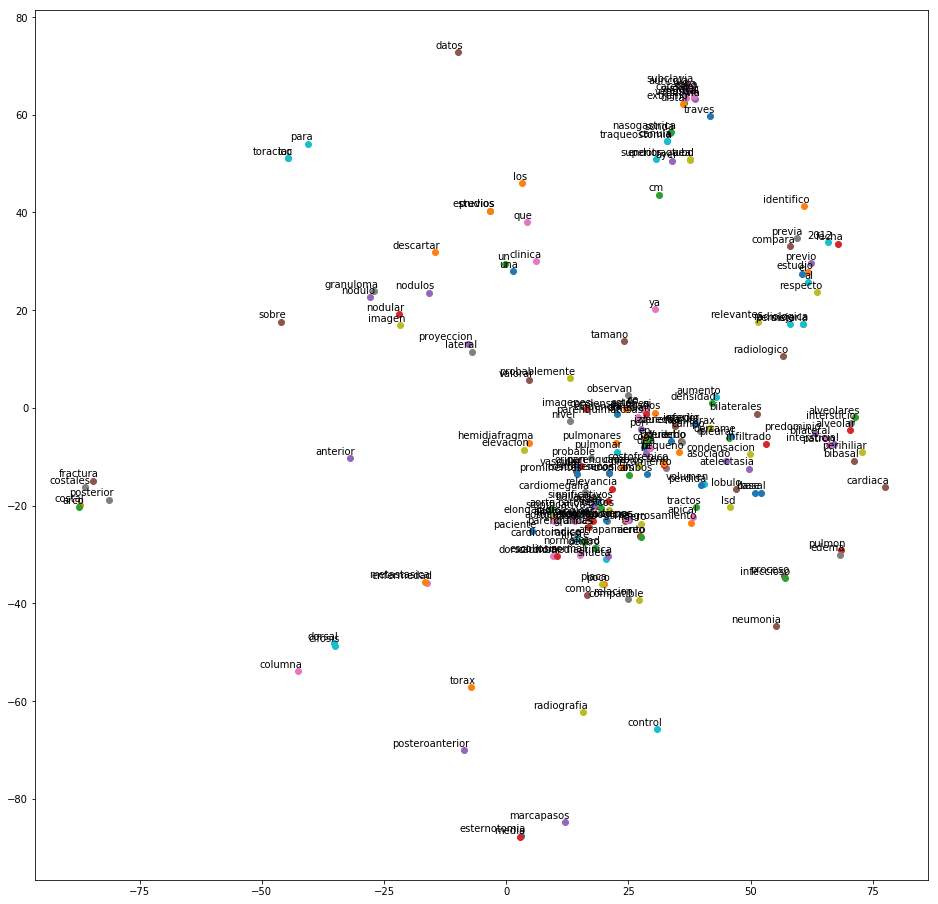

In [16]:
n_words_to_display = 200
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16)) 
for i in range(n_words_to_display):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()
    


## Gensim

In [27]:
import gensim
import pandas as pd
df = pd.read_csv('report_sentences_cleaned.csv', encoding="ISO-8859-1")
sentences = [str(line).replace('.','').split() for line in df['v_clean']] 
model = gensim.models.Word2Vec(sentences)
model.save('./gensim/text')


In [28]:
new_model = gensim.models.Word2Vec.load('./gensim/text')
print(new_model['epoc'])  # raw NumPy vector of a word)

[ -1.67921937e+00   1.98219568e-01  -2.00609732e+00   1.45661616e+00
  -1.77284837e-01   1.21857250e+00  -1.08579111e+00  -5.08100808e-01
  -4.95333290e+00   4.05835533e+00  -9.60468888e-01   1.22637606e+00
  -1.65951884e+00  -2.46254206e+00  -3.26448441e+00  -1.63340378e+00
   8.38718712e-01   3.61533672e-01  -1.14925230e+00  -4.79312003e-01
  -1.54394820e-01   9.91045058e-01   4.79986370e-01  -1.31115735e+00
   1.01612747e+00   1.37172544e+00  -1.52998269e-01   1.59704164e-01
   1.67005312e+00  -3.94984603e+00   4.33642743e-03  -1.50105715e+00
   7.83112884e-01  -1.93653262e+00  -9.46645558e-01   2.89587831e+00
  -2.92780161e+00  -1.07050240e+00  -2.12467194e+00  -1.63733289e-01
   2.38434982e+00   2.75024891e-01   6.75451577e-01  -1.31783915e+00
  -1.45222390e+00   3.96128029e-01  -1.51711237e+00  -1.47487390e+00
  -1.70177841e+00  -1.33423507e+00   8.48531604e-01   2.67654037e+00
  -1.40882933e+00  -1.49918747e+00  -1.13567901e+00   2.40818977e+00
  -1.27731657e+00  -8.09062183e-01

In [29]:
new_model.wv.similar_by_word('derrame', topn=10, restrict_vocab=None) 

[('derrrame', 0.6889109015464783),
 ('derame', 0.6243678331375122),
 ('liquido', 0.5472326278686523),
 ('errame', 0.5266581773757935),
 ('hidroneumotorax', 0.5038566589355469),
 ('engrosamiento', 0.46031394600868225),
 ('perihiliar', 0.44888943433761597),
 ('efusion', 0.44675907492637634),
 ('apical', 0.4318743348121643),
 ('hemotorax', 0.4283487796783447)]

In [30]:
new_model.wv.similar_by_word('epoc', topn=10, restrict_vocab=None) 

[('indirectos', 0.5165836811065674),
 ('marcados', 0.450700581073761),
 ('importantes', 0.42677703499794006),
 ('atrapamiento', 0.3980032801628113),
 ('hiperinsuflacion', 0.3783106803894043),
 ('revascularizacion', 0.36750543117523193),
 ('enfisema', 0.3665423095226288),
 ('aereo', 0.34987324476242065),
 ('panalizacion', 0.3474608361721039),
 ('panal', 0.33097201585769653)]

In [32]:
df = pd.read_csv('report_sentences_preprocessed.csv', encoding="ISO-8859-1")
sentences = [str(line).replace('.','').split() for line in df['v_preprocessed']] 
model = gensim.models.Word2Vec(sentences)
model.save('./gensim/text_stemmed')

In [50]:
new_model = gensim.models.Word2Vec.load('./gensim/text_stemmed')
print("Vocabulary size: " + repr(len(new_model.wv.index2word)))
new_model.wv.similar_by_word('derrame', topn=10, restrict_vocab=None) 

Vocabulary size: 3896


[('visualizadas', 0.5875097513198853),
 ('consolid', 0.5805746912956238),
 ('complicaciones', 0.510115921497345),
 ('consolidaciones', 0.4602455496788025),
 ('compromis', 0.45739394426345825),
 ('infiltrados', 0.4513780474662781),
 ('plan', 0.44043833017349243),
 ('consolidacion', 0.4261775612831116),
 ('parenquimatosas', 0.4247497022151947),
 ('tampoc', 0.4150521755218506)]

In [37]:
new_model.wv.similar_by_word('epoc', topn=10, restrict_vocab=None) 

[('atrap', 0.4256821274757385),
 ('enfisema', 0.3824343681335449),
 ('hiperinsuflacion', 0.3650832772254944),
 ('enfisem', 0.36404234170913696),
 ('ginecomastia', 0.3363493084907532),
 ('aereo', 0.33572572469711304),
 ('bull', 0.31173259019851685),
 ('enfisematoso', 0.3057968318462372),
 ('aere', 0.2959698438644409),
 ('mejori', 0.29244738817214966)]

## Visualizing wordembeddings with TensorBoard's Embedding Projector 

TensorBoard includes the Embedding Projector, a tool that allows the interactively visualization of embeddings. This tool read embeddings and render them in two or three dimensions.
It provides three ways to reduce the dimensionality of a data set.
- t-SNE: (already presented above) a nonlinear nondeterministic algorithm  that tries to preserve local neighborhoods in the data, often at the expense of distorting global structure.
- PCA: a linear deterministic algorithm (principal component analysis) that tries to capture as much of the data variability in as few dimensions as possible. PCA tends to highlight large-scale structure in the data, but can distort local neighborhoods. The Embedding Projector computes the top 10 principal components, from which two or three can be choosen to view.
- Custom: a linear projection onto horizontal and vertical axes is specified  using labels in the data. The Embedding Projector finds all points whose label matches the "Left" pattern and computes the centroid of that set; similarly for "Right". The line passing through these two centroids defines the horizontal axis. The vertical axis is likewise computed from the centroids for points matching the "Up" and "Down" text patterns.

The execution of the "word2vec2tensor" script -which is an adaptation of https://github.com/RaRe-Technologies/gensim/blob/develop/gensim/scripts/word2vec2tensor.py - is used to convert the word2vec formats to Tensorflow 2D tensor and metadata formats for Embedding Visualization. The script will create two TSV files. A 2d tensor format file, and a Word Embedding metadata file. Both files will use the --output file name as prefix.

In [60]:

! /Users/aureliabustos/anaconda3/envs/aind/bin/python word2vec2tensor -i ./gensim/text -o gensim

2017-12-03 12:05:09,568 : MainThread : INFO : running word2vec2tensor -i ./gensim/text -o gensim
2017-12-03 12:05:09,570 : MainThread : INFO : loading projection weights from ./gensim/text
2017-12-03 12:05:09,570 : MainThread : INFO : loading Word2Vec object from ./gensim/text
2017-12-03 12:05:09,625 : MainThread : INFO : loading wv recursively from ./gensim/text.wv.* with mmap=None
2017-12-03 12:05:09,625 : MainThread : INFO : setting ignored attribute syn0norm to None
2017-12-03 12:05:09,625 : MainThread : INFO : setting ignored attribute cum_table to None
2017-12-03 12:05:09,625 : MainThread : INFO : loaded ./gensim/text
2017-12-03 12:05:10,316 : MainThread : INFO : 2D tensor file saved to gensim_tensor.tsv
2017-12-03 12:05:10,316 : MainThread : INFO : Tensor metadata file saved to gensim_metadata.tsv
2017-12-03 12:05:10,317 : MainThread : INFO : finished running word2vec2tensor


In [62]:
! /Users/aureliabustos/anaconda3/envs/aind/bin/python word2vec2tensor -i ./fasttext/text.vec -o fasttext

2017-12-03 12:06:05,751 : MainThread : INFO : running word2vec2tensor -i ./fasttext/text.vec -o fasttext
2017-12-03 12:06:05,752 : MainThread : INFO : loading projection weights from ./fasttext/text.vec
2017-12-03 12:06:06,282 : MainThread : INFO : loaded (4706, 100) matrix from ./fasttext/text.vec
2017-12-03 12:06:06,804 : MainThread : INFO : 2D tensor file saved to fasttext_tensor.tsv
2017-12-03 12:06:06,804 : MainThread : INFO : Tensor metadata file saved to fasttext_metadata.tsv
2017-12-03 12:06:06,805 : MainThread : INFO : finished running word2vec2tensor


To use the generated TSV 2D tensor and metadata file in the Projector Visualizer, please
1) Open http://projector.tensorflow.org/.
2) Choose "Load Data" from the left menu.
3) Select "Choose file" in "Load a TSV file of vectors." and choose the local "_tensor.tsv" file.
4) Select "Choose file" in "Load a TSV file of metadata." and choose the local "_metadata.tsv" file.

### Examples of visualizations comparing FastText and Gensim: 

Applying PCA, for both FastText and Gensim, the nearest points in the original space to "D11" -which is a shortname for the dorsal vertebrae number 11-, are more vertebraes (e.g: D12, D10, D8, D9, etc..), other bone anatomical regions (e.g: cuerpos, vertebrales, costovertebral, osteofitos) and bone related disease terminology (e.g. aplastamiento, osteoporosis, ..).  

In [68]:

from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='FastText_D11.png'></td></tr><tr><td><img src='Gensim_D11.png'></td></tr></table>"))


""
""


Similarly, the nearest points to "hiliar" for both FastText and Gensim are neighbors anatomical in the centro-thoracic regions such as the mediastinal, paramediastinal, paraaortic and central bronchial tree such as peritraqueal, subcarinal etc .. 

In [69]:
display(HTML("<table><tr><td><img src='FastText_hiliar.png'></td></tr><tr><td><img src='gensim_hiliar.png'></td></tr></table>"))



""
""


 TODO:  test analogies, compare embeddings using larger medical corpus (manual Merck), generate ensemble model of this two wordembeddings,  generate embeddings at Rx report level and try to classify it in 14 catetories (the reports corresponding to the image-dataset need to be manually labeled to first train a model to classify reports and to train the image classification model)  